In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
import sklearn
from sklearn.preprocessing import Normalizer
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import tensorflow as tf
from tensorflow import keras
# to make this notebook's output stable across runs np.random.seed(42)
tf.random.set_seed(42)
# TensorFlow ≥2.0 is required import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [2]:
(X, y), (test_X, test_y) = keras.datasets.cifar10.load_data()
valid_X, valid_y = X[-10000:], y[-10000:] # Use last 10,000 instances as validation data
train_X, train_y = X[:40000], y[:40000] # Use first 40,000 instances as test data

# Standardizing features
mean_X = X.mean(axis=0, keepdims=True)
std_X = X.std(axis=0, keepdims=True) + 1e-7
train_X = (train_X - mean_X) / std_X
valid_X = (valid_X - mean_X) / std_X
test_X = (test_X - test_X.mean(axis=0, keepdims=True)) / (test_X.std(axis=0, keepdims=True) + 1e-7)

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
train_X.shape

(40000, 32, 32, 3)

In [4]:
# CNN Model
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu',padding="SAME")
model = keras.models.Sequential([
  DefaultConv2D(filters=16, kernel_size=7, input_shape=[32, 32, 3]),
  keras.layers.BatchNormalization(),
  DefaultConv2D(filters=16),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=32),
  keras.layers.BatchNormalization(),
  DefaultConv2D(filters=32),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=64),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=32, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=16, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=10, activation='softmax'),
  ])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        2368      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                        

In [6]:
# To save training
from tensorflow.keras.optimizers import Nadam

from tensorflow.keras import callbacks

import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,  metrics=["accuracy"])
#early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs=100, validation_data=(valid_X, valid_y))


Epoch 1/100
1250/1250 [==============================] - 24s 11ms/step - loss: 2.2423 - accuracy: 0.1540 - val_loss: 1.9642 - val_accuracy: 0.2611
Epoch 2/100
1250/1250 [==============================] - 12s 10ms/step - loss: 2.0064 - accuracy: 0.2200 - val_loss: 1.7599 - val_accuracy: 0.3489
Epoch 3/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8959 - accuracy: 0.2666 - val_loss: 1.6448 - val_accuracy: 0.3946
Epoch 4/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7931 - accuracy: 0.3124 - val_loss: 1.5469 - val_accuracy: 0.4153
Epoch 5/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.7166 - accuracy: 0.3408 - val_loss: 1.4462 - val_accuracy: 0.4733
Epoch 6/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6392 - accuracy: 0.3683 - val_loss: 1.3815 - val_accuracy: 0.4952
Epoch 7/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5835 - accuracy: 0.3968 - val_loss: 1

In [7]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 1.4629 - accuracy: 0.6877


[1.4628902673721313, 0.6876999735832214]

In [8]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=10,
            zoom_range = 0.05,
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=True,
            vertical_flip=False,
            data_format="channels_last"
)

# data augmenting by expanding by a factor of 0.05 and fliping it upside down

train_generator = data_generator.flow(train_X, train_y, batch_size)
steps_per_epoch = train_X.shape[0] // batch_size

data_augmented = model.fit(train_generator, validation_data=(test_X,test_y), epochs=100)


Epoch 1/100
1250/1250 [==============================] - 32s 24ms/step - loss: 1.3954 - accuracy: 0.5396 - val_loss: 1.1982 - val_accuracy: 0.6504
Epoch 2/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3082 - accuracy: 0.5507 - val_loss: 1.2150 - val_accuracy: 0.6524
Epoch 3/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3226 - accuracy: 0.5514 - val_loss: 1.1625 - val_accuracy: 0.6519
Epoch 4/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2923 - accuracy: 0.5547 - val_loss: 1.0416 - val_accuracy: 0.6650
Epoch 5/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2853 - accuracy: 0.5577 - val_loss: 1.0958 - val_accuracy: 0.6625
Epoch 6/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2539 - accuracy: 0.5688 - val_loss: 1.1432 - val_accuracy: 0.6485
Epoch 7/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2760 - accuracy: 0.5609 - val_loss: 1

313/313 - 1s - loss: 0.9627 - accuracy: 0.7148 - 835ms/epoch - 3ms/step
Test Loss after augmentation: 0.9627256989479065
Test Accuracy after augmentation: 0.7148000001907349


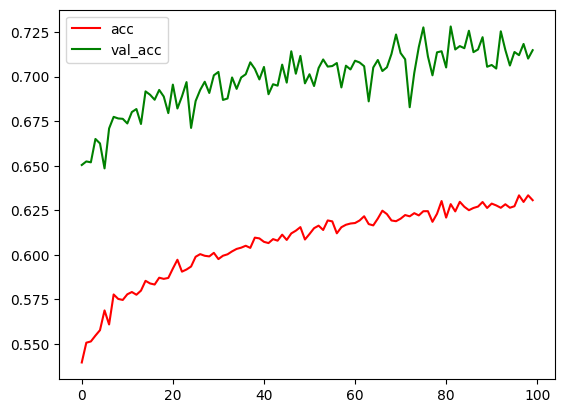

In [9]:
test_loss_aug, test_accuracy_aug = model.evaluate(test_X, test_y, verbose=2)

print(f'Test Loss after augmentation: {test_loss_aug}')
print(f'Test Accuracy after augmentation: {test_accuracy_aug}')

plt.plot(data_augmented.history['accuracy'], label='acc', color='red')
plt.plot(data_augmented.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [10]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.9627 - accuracy: 0.7148


[0.9627256989479065, 0.7148000001907349]

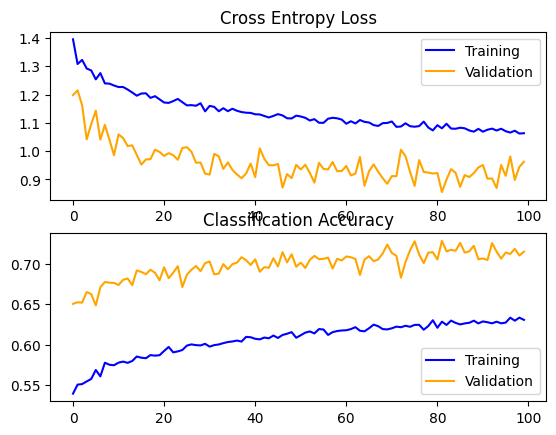

In [11]:
from matplotlib import pyplot
def summarize_diagnostics(history):
 # plot loss
  pyplot.subplot(211)

  pyplot.title('Cross Entropy Loss')
  line1 = pyplot.plot(history.history['loss'], color='blue', label='train')
  line2= pyplot.plot(history.history['val_loss'], color='orange', label='test')
  pyplot.legend()
  pyplot.legend(handles= [line1[0], line2[0]],labels=['Training', 'Validation'])
 # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  line3 = pyplot.plot(history.history['accuracy'], color='blue', label='train')
  line4 = pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  pyplot.legend(handles= [line3[0], line4[0]],labels=['Training', 'Validation'])
 # plot accuracy
  pyplot.show()
 # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()

summarize_diagnostics(data_augmented)

In [12]:
# Validate images from the validation set
val_predictions = model.predict(valid_X)
val_pred_labels = np.argmax(val_predictions, axis=1)


313/313 [==============================] - 1s 2ms/step


In [13]:
# Since valid_y is in shape (10000, 1), we need to flatten it to (10000,) for comparison
valid_y_flat = valid_y.flatten()


In [14]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
# Function to plot images along with their predicted and actual labels
def plot_images(images, true_labels, pred_labels, class_names, num_images=20):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        pred_label = class_names[pred_labels[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

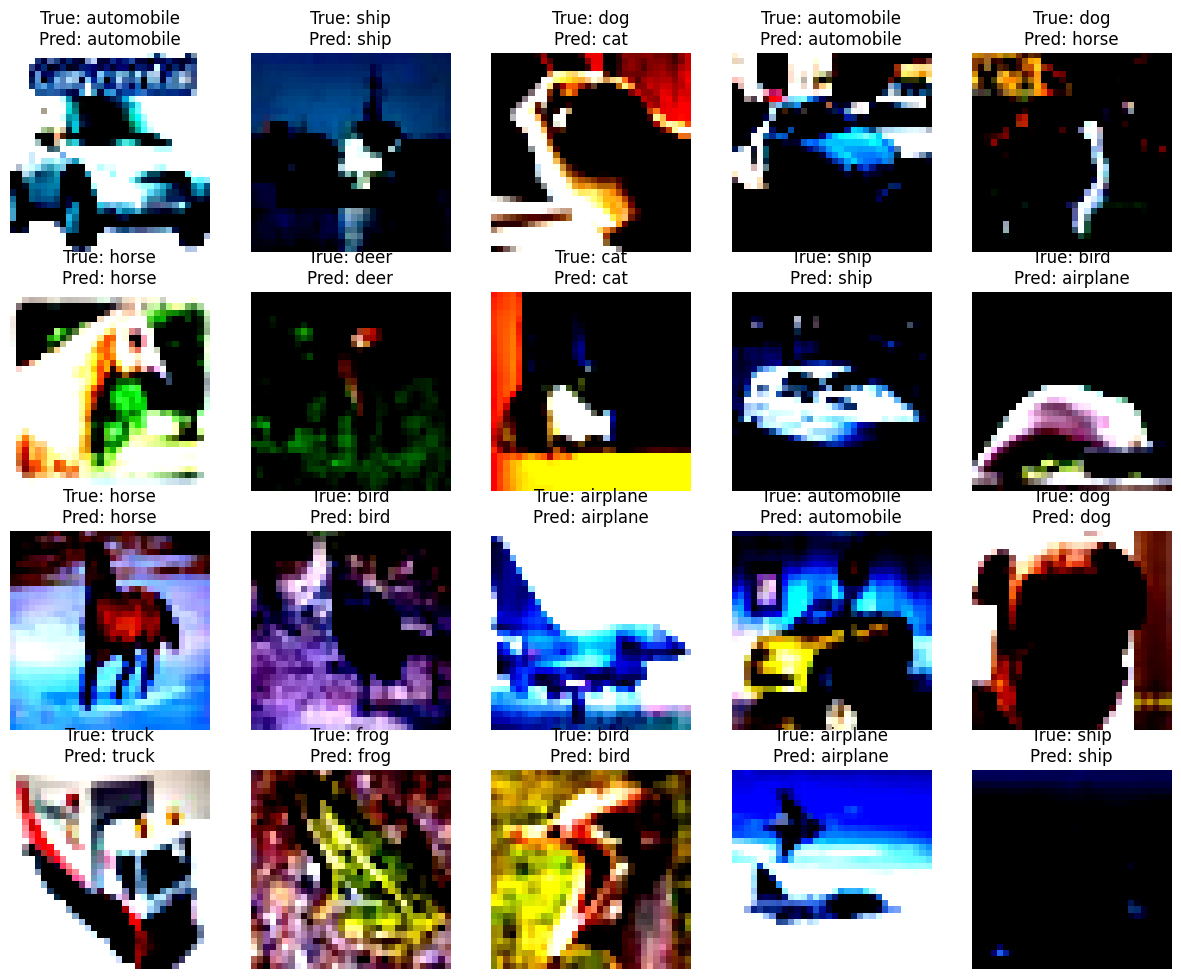

In [16]:

# Plot the first 20 images from the validation dataset
plot_images(valid_X[:20], valid_y_flat[:20], val_pred_labels[:20], class_names)

In [21]:
from sklearn.metrics import classification_report
report = classification_report(valid_y_flat, val_pred_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.84      0.78      0.81      1014
  automobile       0.91      0.88      0.89      1014
        bird       0.63      0.61      0.62       952
         cat       0.44      0.41      0.43      1016
        deer       0.84      0.58      0.68       997
         dog       0.69      0.45      0.55      1025
        frog       0.59      0.94      0.72       980
       horse       0.80      0.82      0.81       977
        ship       0.92      0.86      0.89      1003
       truck       0.72      0.92      0.81      1022

    accuracy                           0.72     10000
   macro avg       0.74      0.73      0.72     10000
weighted avg       0.74      0.72      0.72     10000



In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
model.save('/content/drive/MyDrive/CNN.h5')
